In [1]:
### ITEM BASED FILTERING
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('C:/Users/harik/OneDrive/Desktop/movielens/ratings.csv',
              names=['user_id','movie_id','rating','timestamp'])
df.head()


user_id  movie_id  rating  timestamp
0        1         1     4.0  964982703
1        1         3     4.0  964981247
2        1         6     4.0  964982224
3        1        47     5.0  964983815
4        1        50     5.0  964982931

In [2]:
movie_titles=pd.read_csv('C:/Users/harik/OneDrive/Desktop/movielens/movies.csv', 
                         names=['movie_id','title','genres'])
movie_titles.head()

movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [3]:
df=pd.merge(df,movie_titles,on='movie_id')
df=df[['user_id','movie_id','rating','timestamp','title']]
df.head()


user_id  movie_id  rating   timestamp             title
0        1         1     4.0   964982703  Toy Story (1995)
1        5         1     4.0   847434962  Toy Story (1995)
2        7         1     4.5  1106635946  Toy Story (1995)
3       15         1     2.5  1510577970  Toy Story (1995)
4       17         1     4.5  1305696483  Toy Story (1995)

In [4]:
df.describe()

user_id       movie_id         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

In [5]:
#each movie with it's average rating along with how many people have rated it.
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['number_of_ratings']=df.groupby('title')['rating'].count()
ratings.head()


rating  number_of_ratings
title                                                             
'71 (2014)                                  4.0                  1
'Hellboy': The Seeds of Creation (2004)     4.0                  1
'Round Midnight (1986)                      3.5                  2
'Salem's Lot (2004)                         5.0                  1
'Til There Was You (1997)                   4.0                  2

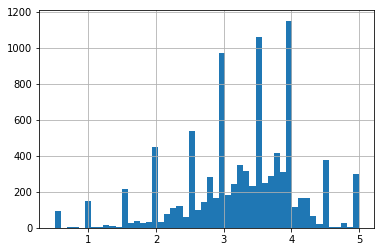

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

#We can see that most of the movies are rated between 2.5 and 4



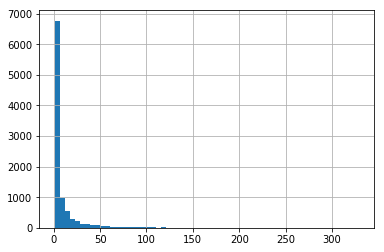

In [7]:
ratings['number_of_ratings'].hist(bins=60)

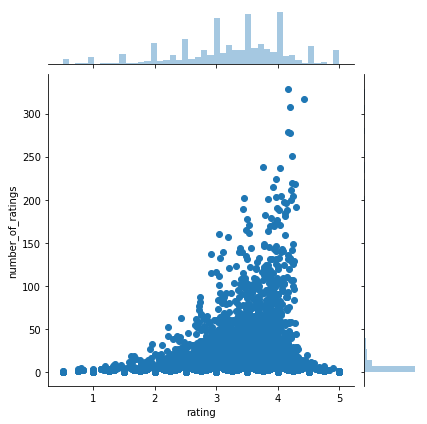

In [8]:
#Check the relationship between the rating of the movie and no. of ratings
#Seaborn's jointplot() helps us visualize this
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)
#clearly there is a positive rel. b/w average rating and no. of ratings
#the more the ratings a movie gets, higher the average rating it gets
#This is important to note especially when choosing the threshold for the number of ratings per movie.

In [9]:
#create a matrix with movie_titles as columns and user_id as rows(index)
#use pandas' pivot_table() to create it

movie_matrix=df.pivot_table(index='user_id',columns='title',values='rating')
movie_matrix.head()

title    '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
user_id                                                        
1               NaN                                      NaN   
2               NaN                                      NaN   
3               NaN                                      NaN   
4               NaN                                      NaN   
5               NaN                                      NaN   

title    'Round Midnight (1986)  'Salem's Lot (2004)  \
user_id                                                
1                           NaN                  NaN   
2                           NaN                  NaN   
3                           NaN                  NaN   
4                           NaN                  NaN   
5                           NaN                  NaN   

title    'Til There Was You (1997)  'Tis the Season for Love (2015)  \
user_id                                                               
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   
5                              NaN                              NaN   

title    'burbs, The (1989)  'night Mother (1986)  \
user_id                                             
1                       NaN                   NaN   
2                       NaN                   NaN   
3                       NaN                   NaN   
4                       NaN                   NaN   
5                       NaN                   NaN   

title    (500) Days of Summer (2009)  *batteries not included (1987)  ...  \
user_id                                                               ...   
1                                NaN                             NaN  ...   
2                                NaN                             NaN  ...   
3                                NaN                             NaN  ...   
4                                NaN                             NaN  ...   
5                                NaN                             NaN  ...   

title    Zulu (2013)  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
user_id                                                                      
1                NaN           NaN            NaN                      NaN   
2                NaN           NaN            NaN                      NaN   
3                NaN           NaN            NaN                      NaN   
4                NaN           NaN            NaN                      NaN   
5                NaN           NaN            NaN                      NaN   

title    anohana: The Flower We Saw That Day - The Movie (2013)  \
user_id                                                           
1                                                      NaN        
2                                                      NaN        
3                                                      NaN        
4                                                      NaN        
5                                                      NaN        

title    eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
user_id                                                                
1                    NaN         NaN                             NaN   
2                    NaN         NaN                             NaN   
3                    NaN         NaN                             NaN   
4                    NaN         NaN                             NaN   
5                    NaN         NaN                             NaN   

title    ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  
user_id                                                                    
1                          4.0                                        NaN 

In [10]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

rating  number_of_ratings
title                                                                 
Forrest Gump (1994)                        4.164134                329
Shawshank Redemption, The (1994)           4.429022                317
Pulp Fiction (1994)                        4.197068                307
Silence of the Lambs, The (1991)           4.161290                279
Matrix, The (1999)                         4.192446                278
Star Wars: Episode IV - A New Hope (1977)  4.231076                251
Jurassic Park (1993)                       3.750000                238
Braveheart (1995)                          4.031646                237
Terminator 2: Judgment Day (1991)          3.970982                224
Schindler's List (1993)                    4.225000                220

In [11]:
'''
Assume that a user has watched 2 movies A and B,we have to recommend movies to this user based 
on this watching history. Hence we should look for movies that are similar to A and B.
We do this by computing the correlation between these 2 movies' ratings and the ratings
of the rest of the movies.
Assume A to be "Matrix, The (1999)" and B to be "Pulp Fiction (1994)"
'''
Matrix_user_rating = movie_matrix['Matrix, The (1999)']
Pulp_user_rating = movie_matrix['Pulp Fiction (1994)']
Matrix_user_rating.head()

user_id
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [12]:
Pulp_user_rating.head()

user_id
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [13]:
#use corrwith() to find correlation between 2 dataframes,columns etc.
similar_to_Matrix = movie_matrix.corrwith(Matrix_user_rating)
similar_to_Matrix.head(50)

title
'71 (2014)                                                     NaN
'Hellboy': The Seeds of Creation (2004)                        NaN
'Round Midnight (1986)                                         NaN
'Salem's Lot (2004)                                            NaN
'Til There Was You (1997)                                      NaN
'Tis the Season for Love (2015)                                NaN
'burbs, The (1989)                                       -0.160843
'night Mother (1986)                                           NaN
(500) Days of Summer (2009)                               0.302316
*batteries not included (1987)                            0.392232
...All the Marbles (1981)                                      NaN
...And Justice for All (1979)                             0.654654
00 Schneider - Jagd auf Nihil Baxter (1994)                    NaN
1-900 (06) (1994)                                              NaN
10 (1979)                                               

In [14]:
similar_to_Pulp=movie_matrix.corrwith(Pulp_user_rating)
similar_to_Pulp.head(50)

title
'71 (2014)                                                     NaN
'Hellboy': The Seeds of Creation (2004)                        NaN
'Round Midnight (1986)                                         NaN
'Salem's Lot (2004)                                            NaN
'Til There Was You (1997)                                      NaN
'Tis the Season for Love (2015)                                NaN
'burbs, The (1989)                                       -0.187323
'night Mother (1986)                                           NaN
(500) Days of Summer (2009)                              -0.044034
*batteries not included (1987)                           -0.738549
...All the Marbles (1981)                                      NaN
...And Justice for All (1979)                            -0.188982
00 Schneider - Jagd auf Nihil Baxter (1994)                    NaN
1-900 (06) (1994)                                              NaN
10 (1979)                                               

In [15]:
#Clearly there are a lot of null values, hence we drop these rows.
corr_Matrix=pd.DataFrame(similar_to_Matrix,columns=['Correlation'])
corr_Matrix.dropna(inplace=True)
corr_Matrix.head()

Correlation
title                                      
'burbs, The (1989)                -0.160843
(500) Days of Summer (2009)        0.302316
*batteries not included (1987)     0.392232
...And Justice for All (1979)      0.654654
10 Cent Pistol (2015)             -1.000000

In [16]:
corr_Pulp=pd.DataFrame(similar_to_Pulp,columns=['Correlation'])
corr_Pulp.dropna(inplace=True)
corr_Pulp.head()

Correlation
title                                      
'burbs, The (1989)                -0.187323
(500) Days of Summer (2009)       -0.044034
*batteries not included (1987)    -0.738549
...And Justice for All (1979)     -0.188982
10 Cent Pistol (2015)              1.000000

In [17]:
#In the above, we didn't set a threshold to the number of ratings for the movie
# i.e only one person could've rated it high, and that doesn't make sense
#Now we set the threshold
corr_Matrix = pd.merge(corr_Matrix,ratings,on="title")
#corr_Matrix = corr_Matrix[['title','Correlation','number_of_ratings']]
corr_Matrix.head()



Correlation    rating  number_of_ratings
title                                                                   
'burbs, The (1989)                -0.160843  3.176471                 17
(500) Days of Summer (2009)        0.302316  3.666667                 42
*batteries not included (1987)     0.392232  3.285714                  7
...And Justice for All (1979)      0.654654  3.166667                  3
10 Cent Pistol (2015)             -1.000000  1.250000                  2

In [18]:
corr_Pulp = pd.merge(corr_Pulp,ratings,on="title")
#corr_Matrix = corr_Matrix[['title','Correlation','number_of_ratings']]
corr_Pulp.head()

Correlation    rating  number_of_ratings
title                                                                   
'burbs, The (1989)                -0.187323  3.176471                 17
(500) Days of Summer (2009)       -0.044034  3.666667                 42
*batteries not included (1987)    -0.738549  3.285714                  7
...And Justice for All (1979)     -0.188982  3.166667                  3
10 Cent Pistol (2015)              1.000000  1.250000                  2

In [19]:
corr_Matrix[corr_Matrix['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

Correlation    rating  number_of_ratings
title                                                          
Matrix, The (1999)        1.000000  4.192446                278
Die Hard (1988)           0.544466  3.862069                145
Inception (2010)          0.514767  4.066434                143
Braveheart (1995)         0.496045  4.031646                237
Aliens (1986)             0.470865  3.964286                126
Lion King, The (1994)     0.444932  3.941860                172
Monsters, Inc. (2001)     0.441205  3.871212                132
Batman Begins (2005)      0.440338  3.862069                116
Jurassic Park (1993)      0.427936  3.750000                238
Fight Club (1999)         0.417196  4.272936                218

In [20]:
corr_Pulp[corr_Pulp['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

Correlation    rating  \
title                                                                       
Pulp Fiction (1994)                                    1.000000  4.197068   
Fight Club (1999)                                      0.543465  4.272936   
Kill Bill: Vol. 1 (2003)                               0.504147  3.961832   
Trainspotting (1996)                                   0.437714  4.039216   
Kill Bill: Vol. 2 (2004)                               0.421685  3.868182   
Usual Suspects, The (1995)                             0.411700  4.237745   
Amelie (Fabuleux destin d'Amélie Poulain, Le) (...     0.402193  4.183333   
Eternal Sunshine of the Spotless Mind (2004)           0.401534  4.160305   
Reservoir Dogs (1992)                                  0.394687  4.202290   
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)              0.391141  3.983051   

                                                    number_of_ratings  
title                                                                  
Pulp Fiction (1994)                                               307  
Fight Club (1999)                                                 218  
Kill Bill: Vol. 1 (2003)                                          131  
Trainspotting (1996)                                              102  
Kill Bill: Vol. 2 (2004)                                          110  
Usual Suspects, The (1995)                                        204  
Amelie (Fabuleux destin d'Amélie Poulain, Le) (...                120  
Eternal Sunshine of the Spotless Mind (2004)                      131  
Reservoir Dogs (1992)                                             131  
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                         177

In [ ]:
#Recommend anything apart from the first one